### First, dive in and explore the data set. Include your code and visuals from this process in your final write up. While doing this, look for something that provokes a question; specifically one that can be answered with an experiment.
    Use the dataset from Airbnb that focuses on Austin from the previous Thinkful exercises. 
    Create visualizations of interesting bits of data. 
    Find correlations between certain fields and the host's review score. 

In [57]:
# Import the necessary features for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

       review_scores_rating     bedrooms
count           3783.000000  3783.000000
mean              95.432990     1.708432
std                7.265217     1.138876
min               20.000000     0.000000
25%               93.000000     1.000000
50%               98.000000     1.000000
75%              100.000000     2.000000
max              100.000000    10.000000


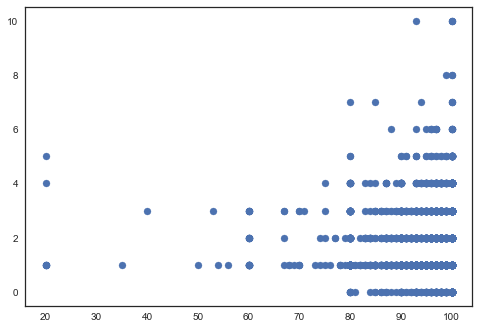

In [86]:
# Let's find some interesting datapoints that might have an affect on a host's review_scores_rating

# Create a new dataframe with a subset of the data
df_use = df.loc[:,['review_scores_rating', 'bedrooms']]
df_use = df_use.dropna()
print(df_use.describe())
# Make a scatter plot
plt.scatter(df_use['review_scores_rating'], df_use['bedrooms'])
plt.show()

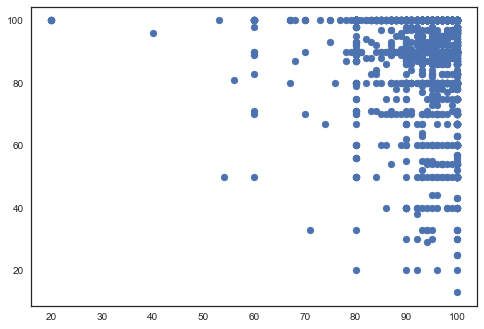

In [82]:
# Compare response rate to review_scores_rating

df_response = df.loc[:, ['host_response_rate', 'review_scores_rating']].dropna()
df_response['host_response_rate'] = df_response['host_response_rate'].str.rstrip('%').astype(int)
plt.scatter(df_response['review_scores_rating'], df_response['host_response_rate'])
plt.show()

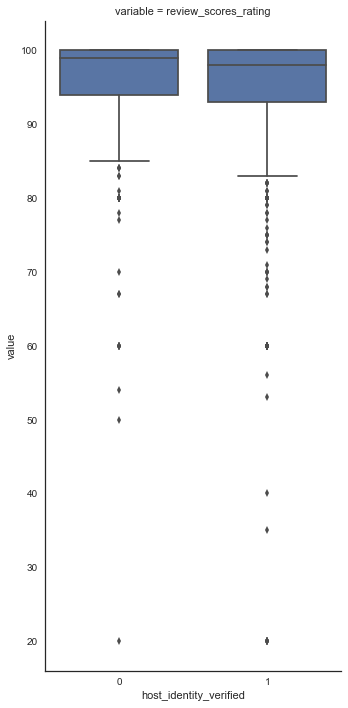

In [85]:
# Create a new dataframe with a subset of the data
df_use = df.loc[
    ((df['host_identity_verified'] == 't') | (df['host_identity_verified'] == 'f')), 
    ['host_identity_verified', 'review_scores_rating']]
df_use['host_identity_verified'] = np.where(df_use['host_identity_verified'] == 't', 1, 0)
df_box = df_use.dropna()
df_box = df_box = pd.melt(df_box, id_vars = ['host_identity_verified'], value_vars = ['review_scores_rating'])

# print(df_box)

g = sns.FacetGrid(df_box, col='variable', size = 10, aspect = .5)
g = g.map(sns.boxplot, 'host_identity_verified', 'value')
plt.show()

### Analysis that highlights your experimental hypothesis.

    Hypothesis - A verified host will receive a higher review score. 
    Null Hypothesis - A host's verification does not have an effect on his review score. 

### A rollout plan showing how you would implement and rollout the experiment.

 Experiment Proposal:
   
	Two Versions: Verified hosts vs non-verified hosts.
    
	Two Samples: Use a binomial distribution to show the hosts as verified to half of users and non-verified to the other half.
    
    Hypothesis: A user is more likely to leave a higher review for a verified host. 
    
    Null Hypothesis: A host's verification does not have an effect on his review score. 
    
    Outcomes of Interest: Review_score_rating for a host when he is shown as verified vs when he is shown as non-verified. 
    
    Other Measured Variables: The locations of the units to areas of interest, the number of bedrooms, and the number of bathrooms. 
    
    Proposal: Select a group of properties in Austin, Texas. Randomly select half the users to see that the host of the property is verified for any property they view. For the other half, show that the host is not verified. Collect data on the review_score_rating over the course of one year. Compare the review_score_rating for hosts when they are shown as verified vs when they are shown as non-verified. 

### An evaluation plan showing what constitutes success in this experiment

The experiment would be a success if a host's verification status is shown to have an effect on his review score ratings. The experiment could also be considered successful if the null hypothesis were shown to be true. 